In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras.layers import Dense

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Fraud.csv")

In [ ]:
df.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
df['newbalanceDest'] = df['newbalanceDest'].fillna(method = 'ffill')
df['isFraud'] = df['isFraud'].fillna(method = 'ffill')
df['isFlaggedFraud'] = df['isFlaggedFraud'].fillna(method = 'ffill')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<Axes: xlabel='type', ylabel='count'>

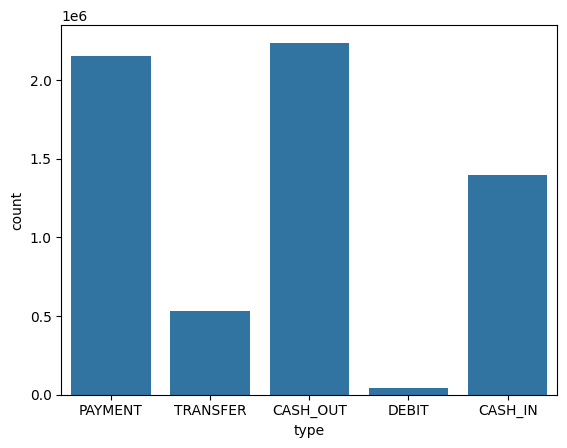

In [ ]:
sns.countplot(x = 'type', data = df)

In [ ]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

1.0: Transaction is Fraud 
0.0: Transaction is legit


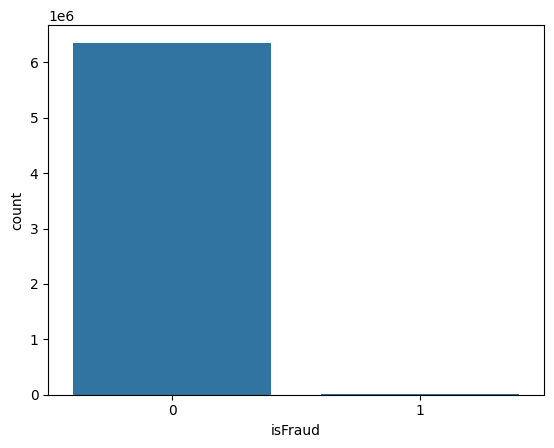

In [ ]:
sns.countplot(x = 'isFraud', data = df)
print("1.0: Transaction is Fraud \n0.0: Transaction is legit")

In [ ]:
sns.scatterplot(x = 'oldbalanceOrg', y = 'newbalanceOrig', data = df, hue = 'isFraud')

In [ ]:
sns.scatterplot(x = 'oldbalanceDest', y = 'newbalanceDest', data = df, hue = 'isFraud')

In [ ]:
sns.violinplot(x = 'newbalanceDest', data = df)

In [ ]:
sns.violinplot(x = 'oldbalanceDest', data = df)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
new_type = pd.get_dummies(df['type'], dtype = int)

In [ ]:
df1 = pd.DataFrame(new_type)

In [ ]:
df = pd.concat([df,df1], axis = 1)

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,0,0,0,0,1


In [ ]:
df = df.drop('type', axis = 1)

In [ ]:
df.head(10)

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0,0,0,0,1,0
5,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0,0,0,0,1,0
6,1,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0,0,0,0,1,0
7,1,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0,0,0,0,1,0
8,1,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0,0,0,0,1,0
9,1,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0,0,0,1,0,0


In [ ]:
X = df.drop({'isFraud', 'nameOrig', 'nameDest'}, axis = 1)
y = df[['isFraud']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5090096, 12)
(1272524, 12)
(5090096, 1)
(1272524, 1)


In [ ]:
print(X_train)
print(X_test)
print(y_train)
print(y_test)

         step     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
2095891   182   22061.82       95437.09        73375.27            0.00   
448925     19   85884.06       24110.00       109994.06            0.00   
830622     41   10822.98           0.00            0.00            0.00   
800132     40  112535.64           0.00            0.00       386805.03   
5663264   396   80379.04           0.00            0.00       650735.76   
...       ...        ...            ...             ...             ...   
3667976   276   24818.33           0.00            0.00            0.00   
5875613   403   16236.04       12141.00            0.00            0.00   
2193371   185  175827.29       10329.00            0.00      2882328.00   
5446666   379  106502.70           0.00            0.00       393976.43   
5512931   380    7390.81       28867.65        21476.84            0.00   

         newbalanceDest  isFlaggedFraud  CASH_IN  CASH_OUT  DEBIT  PAYMENT  \
2095891            0.

In [ ]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
tf.random.set_seed(42)
classifier_model = tf.keras.models.Sequential()
classifier_model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (12,)))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dropout(0.3))
classifier_model.add(tf.keras.layers.Dense(units = 50, activation = 'relu'))
classifier_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
classifier_model.compile(optimizer = 'SGD', loss = 'binary_crossentropy', metrics = 'accuracy')

In [ ]:
#calculating the epochs on training and validation dataset
from tensorflow.keras.callbacks import EarlyStopping
Early_Stop = EarlyStopping()
epochs_hist = classifier_model.fit(X_train_scaled,y_train,epochs = 5, validation_data = (X_test_scaled, y_test), batch_size = 125, callbacks=[Early_Stop])

Epoch 1/5
40721/40721 [==============================] - 127s 3ms/step - loss: 0.0119 - accuracy: 0.9986 - val_loss: 0.0085 - val_accuracy: 0.9987
Epoch 2/5
40721/40721 [==============================] - 120s 3ms/step - loss: 0.0088 - accuracy: 0.9987 - val_loss: 0.0081 - val_accuracy: 0.9987
Epoch 3/5
40721/40721 [==============================] - 123s 3ms/step - loss: 0.0085 - accuracy: 0.9987 - val_loss: 0.0080 - val_accuracy: 0.9987
Epoch 4/5
40721/40721 [==============================] - 118s 3ms/step - loss: 0.0084 - accuracy: 0.9987 - val_loss: 0.0080 - val_accuracy: 0.9987
Epoch 5/5
40721/40721 [==============================] - 127s 3ms/step - loss: 0.0083 - accuracy: 0.9987 - val_loss: 0.0079 - val_accuracy: 0.9987


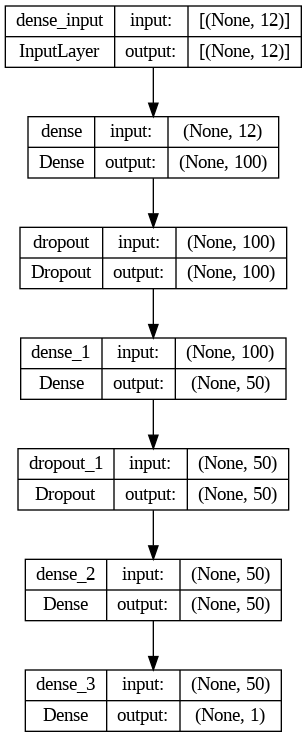

In [ ]:
import keras
keras.utils.plot_model(classifier_model,show_shapes=True)

<Axes: >

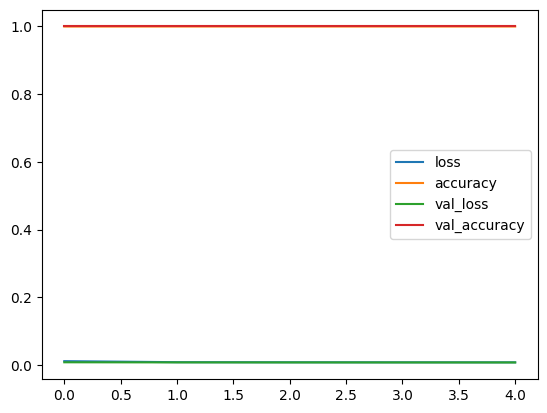

In [ ]:
hist = classifier_model.history.history
new_hist = pd.DataFrame(hist)
new_hist.plot()

In [ ]:
#evaluating the model on the testing dataset.
evaluation = classifier_model.evaluate(X_test,y_test)
print('test accuracy:{}'.format(evaluation[1]))

39767/39767 [==============================] - 66s 2ms/step - loss: 2931.5188 - accuracy: 0.9987
test accuracy:0.9987285137176514


In [ ]:
y_test_predict = classifier_model.predict(X_test)
y_train_predict = classifier_model.predict(X_train)
y_test_predict = y_test_predict > 0.5
y_train_predict = y_train_predict > 0.5

159066/159066 [==============================] - 249s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_train_predict, y_train)
cm2 = confusion_matrix(y_test_predict, y_test)

<Axes: >

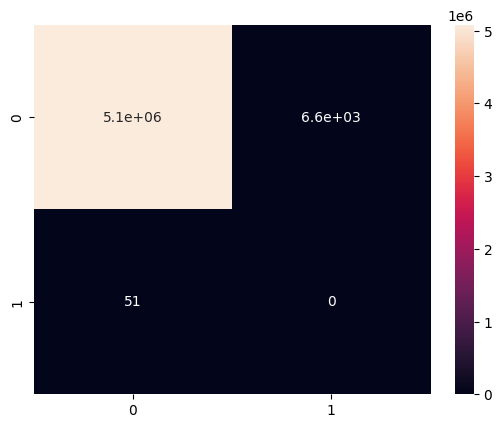

In [ ]:
sns.heatmap(cm, annot = True)

<Axes: >

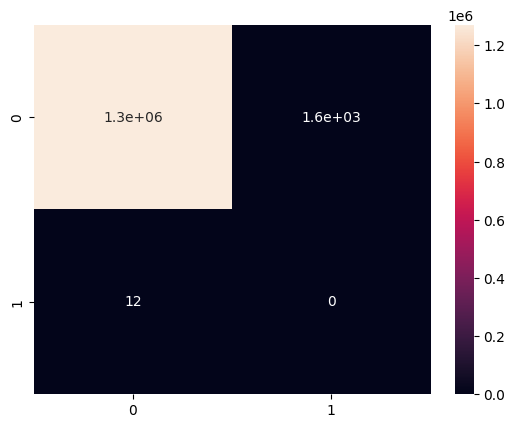

In [ ]:
sns.heatmap(cm2, annot = True)

In [ ]:
print("Training Report:\n", classification_report(y_train_predict, y_train))
print("Testing Report:\n", classification_report(y_test_predict, y_test))

Training Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00   5090045
        True       0.00      0.00      0.00        51

    accuracy                           1.00   5090096
   macro avg       0.50      0.50      0.50   5090096
weighted avg       1.00      1.00      1.00   5090096

Testing Report:
               precision    recall  f1-score   support

       False       1.00      1.00      1.00   1272512
        True       0.00      0.00      0.00        12

    accuracy                           1.00   1272524
   macro avg       0.50      0.50      0.50   1272524
weighted avg       1.00      1.00      1.00   1272524

